In [1]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py

In [2]:
plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

In [3]:
# specify the folder
Year = "2022"
Month = "04"
Day = "15"
BeadNumber =1
folder = r"/home/data_transfer/data_from_windows/"+ Year + Month + Day

foldername = folder+"/Bead"+str(BeadNumber)+"/Discharge/FineDischarge/"

In [4]:
# load the files
files_discharge = load_dir(dirname=foldername, 
                         start_file=0, max_file=1500)

100%|██████████| 225/225 [00:57<00:00,  2.22it/s]

225  files in folder
225  files loaded


In [5]:
# set the drive and settings for the correlation
fdrive=71
nsamp = 50000
fsamp = 5000
sigamp = 1
tarr = np.arange(0, nsamp/fsamp, 1.0/fsamp)
sig = sigamp * np.sin(2.0 * np.pi * fdrive * tarr)


In [6]:
# get the in-phase response x
corrs = [correlation(drive=sig, response=files.x2, fsamp=fsamp, fdrive=fdrive, filt=True, band_width=1) for files in files_discharge]
indices = [np.argmax(cc) for cc in corrs]
in_phase = []
for cc in corrs:
    in_phase.append(cc[0])

    

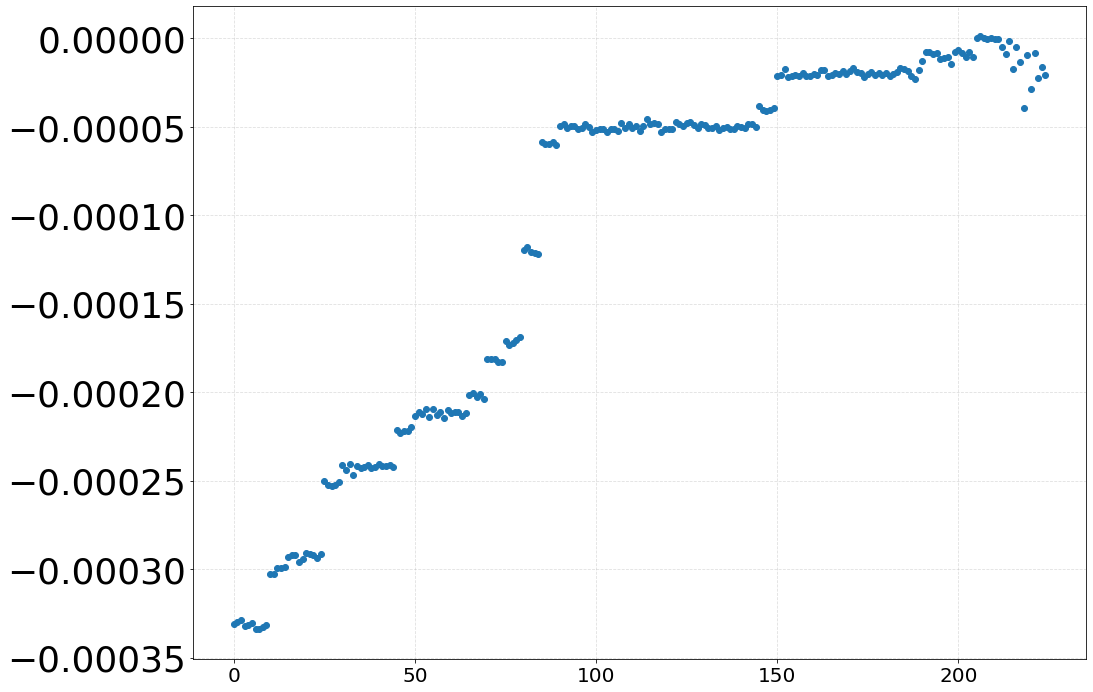

In [7]:
# plot the in-phase response
scale=1
plt.plot(range(len(indices)),np.divide(in_phase,scale),linestyle="",marker="o")
plt.grid(True, which='both', linestyle='--', alpha=0.4)
plt.show()

In [8]:
resp_x = discharge_response(foldername=foldername,str_axis='x',drive_freq=71,max_file=1000)


100%|██████████| 225/225 [00:33<00:00,  7.02it/s]


225  files in folder
225  files loaded


In [9]:
bin_size =5

bin_cont_z, bin_cont_x, bin_cont_y = [ [] for x in range(3)]
bin_unc_z, bin_unc_x, bin_unc_y = [ [] for x in range(3)]
bin_corr, bin_cont_corr, bin_cont_corr = [ [] for x in range(3)]
bin_unc_corr, bin_unc_corr, bin_unc_corr = [ [] for x in range(3)]


for i in np.arange(0,len(resp_x),bin_size):
    bin_cont_x.append(np.mean(resp_x[i:i+bin_size]))
    bin_unc_x.append(np.std(resp_x[i:i+bin_size]))
    bin_corr.append(np.mean(in_phase[i:i+bin_size]))
    bin_unc_corr.append(np.std(in_phase[i:i+bin_size]))      
    

Text(0.5, 0, 'file (binned in chunks of 5)')

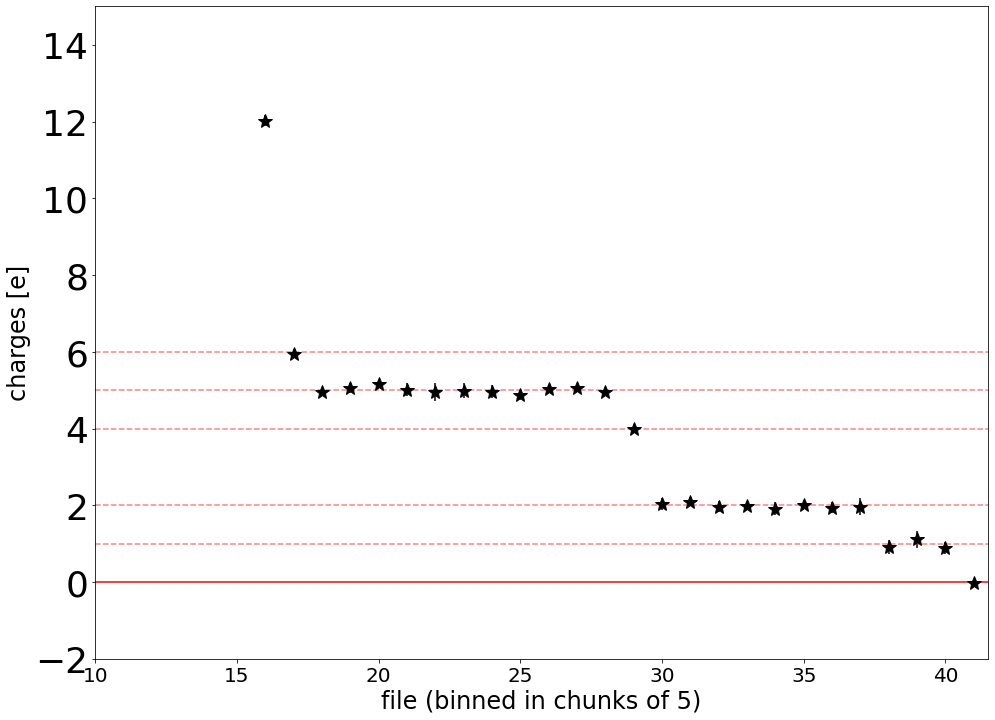

In [98]:
# plot 5 bins with errors
scale=-1e-5
plt.errorbar(range(len(bin_corr)),np.divide(bin_corr,scale),np.divide(bin_unc_corr,scale),linestyle="",marker="*",markersize=15,c="black")
plt.axhline(6,ls="dashed",c='red',alpha=0.5)
plt.axhline(5,ls="dashed",c='red',alpha=0.5)
plt.axhline(4,ls="dashed",c='red',alpha=0.5)
plt.axhline(2,ls="dashed",c='red',alpha=0.5)
plt.axhline(1,ls="dashed",c="red",alpha=0.5)
plt.axhline(0,c="red")
plt.ylim(-2,15)
plt.xlim(10,41.5)
plt.ylabel("charges [e]")
plt.xlabel("file (binned in chunks of 5)")

In [121]:
# F= q*U/d * eta, with eta 0.66
q= 1.602e-19 #C
U=20 #V
d=8e-3#m
force = q*U/d*0.66
print(force)
scalex =1.0e-5



2.6433e-16


In [129]:
# specify the folder
Year = "2022"
Month = "04"
Day = "15"
BeadNumber =1
folder = r"/home/data_transfer/data_from_windows/"+ Year + Month + Day
foldername = folder+"/Bead"+str(BeadNumber)+"/Discharge/Calibration/"

# load the files
files_discharge = load_dir(dirname=foldername, 
                         start_file=0, max_file=1500)



100%|██████████| 66/66 [00:05<00:00, 13.81it/s]

66  files in folder
66  files loaded


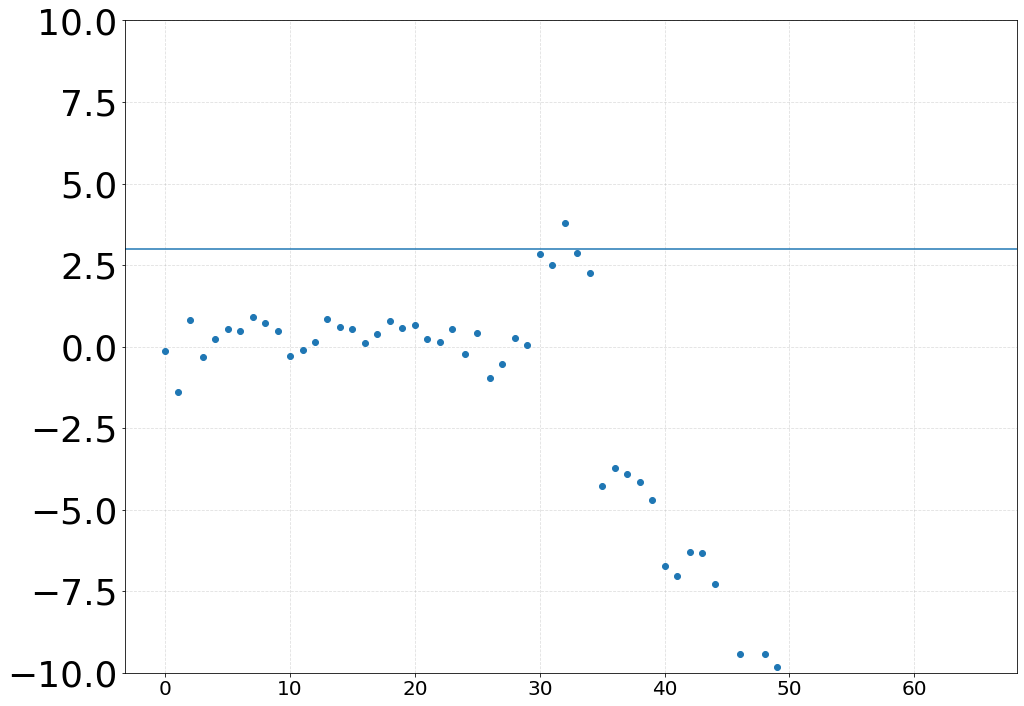

In [155]:

# get the in-phase response x
corrs = [correlation(drive=sig, response=files.x2, fsamp=fsamp, fdrive=fdrive, filt=True, band_width=1) for files in files_discharge]
indices = [np.argmax(cc) for cc in corrs]
in_phasex = []
for cc in corrs:
    in_phasex.append(cc[0])

# get the in-phase response y
corrs = [correlation(drive=sig, response=files.y2, fsamp=fsamp, fdrive=fdrive, filt=True, band_width=1) for files in files_discharge]
indices = [np.argmax(cc) for cc in corrs]
in_phasey = []
for cc in corrs:
    in_phasey.append(cc[0])  
    
# get the in-phase response z
corrs = [correlation(drive=sig, response=files.z2, fsamp=fsamp, fdrive=fdrive, filt=True, band_width=1) for files in files_discharge]
indices = [np.argmax(cc) for cc in corrs]
in_phasez = []
for cc in corrs:
    in_phasez.append(cc[0])        
    
# plot the in-phase response

#plt.plot(range(len(indices)),np.divide(in_phasex,-scalex),linestyle="",marker="o")
#plt.plot(range(len(indices)),np.divide(in_phasey,scalex),linestyle="",marker="o")
plt.plot(range(len(indices)),np.divide(in_phasez,505/3),linestyle="",marker="o")

plt.grid(True, which='both', linestyle='--', alpha=0.4)
plt.ylim(-10,10)
plt.axhline(3)
plt.show()    


In [156]:
# y = 3 charges
scaley = np.mean(in_phasey[25:29])/3
# z = 3 charges?
scalez= np.mean(in_phasez[30:34])/3


In [194]:
print(scalez)

168.53280367944345


In [195]:
#fname = "/data/new_trap/20220415/Bead1/Discharge/FineDischarge/Discharge_199.h5"
fname = "/data/new_trap/20220415/Bead1/InitialTest/InitialTest_31.h5"

# fname = folder+"/Bead"+str(BeadNumber)+"/Discharge"+"/Discharge_%d.h5" % Data_File_Number
#fname = folder+"/Bead"+str(BeadNumber)+"/Discharge/Calibration"+"/Discharge_%d.h5" % Data_File_Number
#fname = folder+"/Bead"+str(BeadNumber)+"/TransFunc/TF_Z_0.h5" 


print(fname)
BDF = BeadDataFile.BeadDataFile(fname)

fsamp=5000
res = 5000

data=BDF.xyz2

data_det=signal.detrend(data)
y_1000=data_det[1]
z_1000=data_det[2]

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res)
ypsd, freqs = matplotlib.mlab.psd(y_1000, Fs = fsamp, NFFT = res)
zpsd, freqs = matplotlib.mlab.psd(z_1000, Fs = fsamp, NFFT = res)

/data/new_trap/20220415/Bead1/InitialTest/InitialTest_31.h5


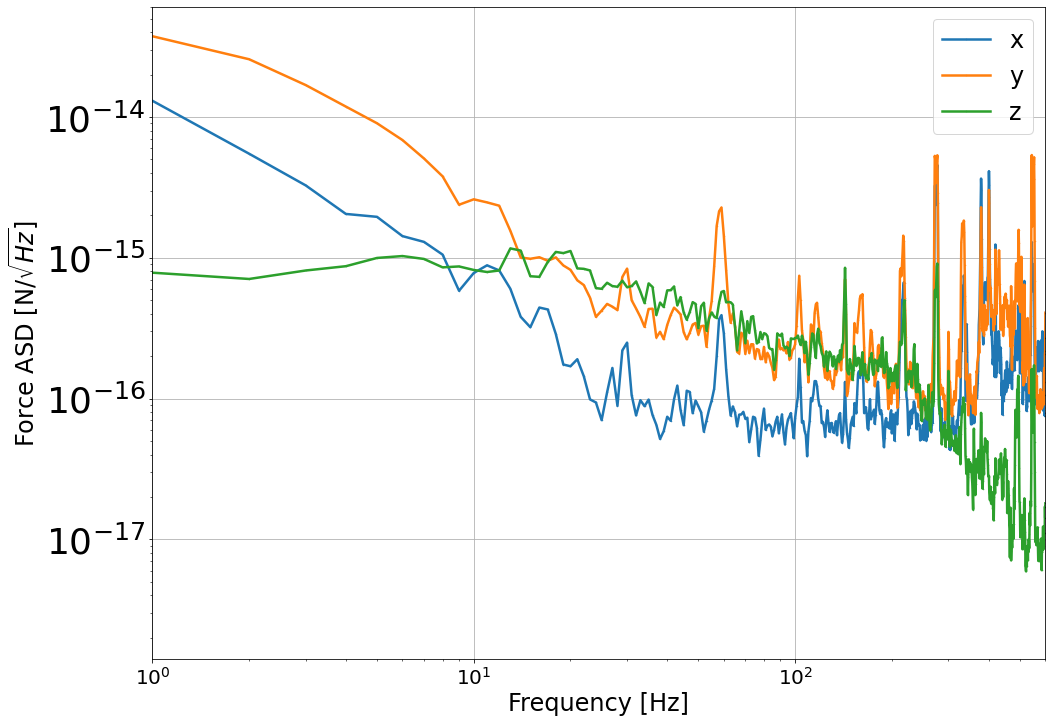

In [196]:
_,ax = plt.subplots()
ax.plot(freqs, np.sqrt(xpsd)*force/scalex, '.-', label="x",markersize=1,linewidth=2.5)
ax.plot(freqs, np.sqrt(ypsd)*force/(scaley), '.-', label="y",markersize=1,linewidth=2.5)
ax.plot(freqs, np.sqrt(zpsd)*force/(scalez), '.-', label="z",markersize=1,linewidth=2.5)
ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Force ASD [N/$\sqrt{Hz}$]')
ax.set_yscale("log")
ax.set_xscale("log")
plt.xlim(1,600)
#plt.ylim(1e6,1e10)
plt.grid(True)
